# RANSAC


In [11]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [12]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor


In [13]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
paramSet = {
    "ex1": {
        "residual_threshold": 1,
    },
    "ex2": {
        "residual_threshold": 5,
    },
    "ex3": {
        "residual_threshold": 10,
    },
}

,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,RANSAC-ex1,0.892565,32.596221,39.790242,41.036819,0.530579,0.507157,"{""residual_threshold"": 1}"
1,RANSAC-ex2,0.723001,29.487122,46.012271,45.703823,0.457175,0.451107,"{""residual_threshold"": 5}"
2,RANSAC-ex3,0.801176,31.462394,40.889905,41.488038,0.517606,0.501738,"{""residual_threshold"": 10}"


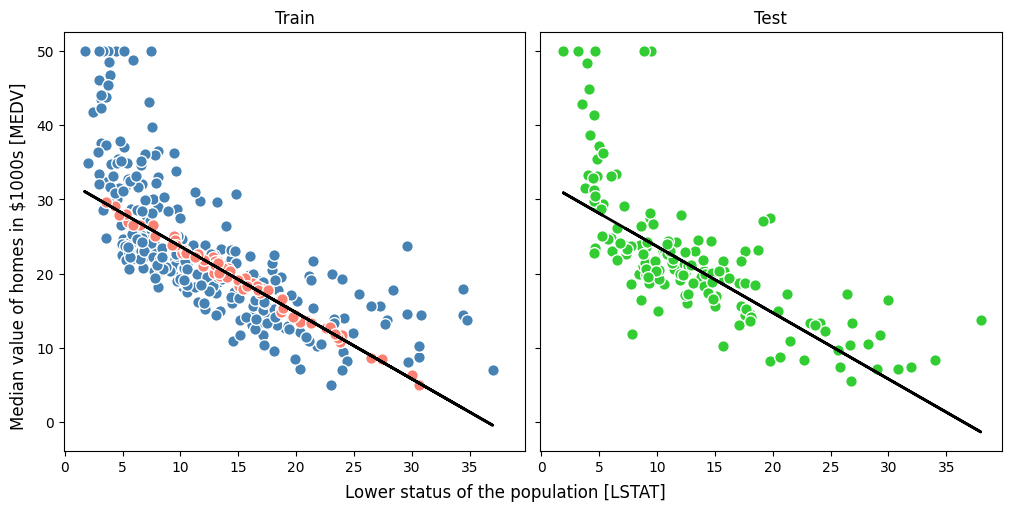

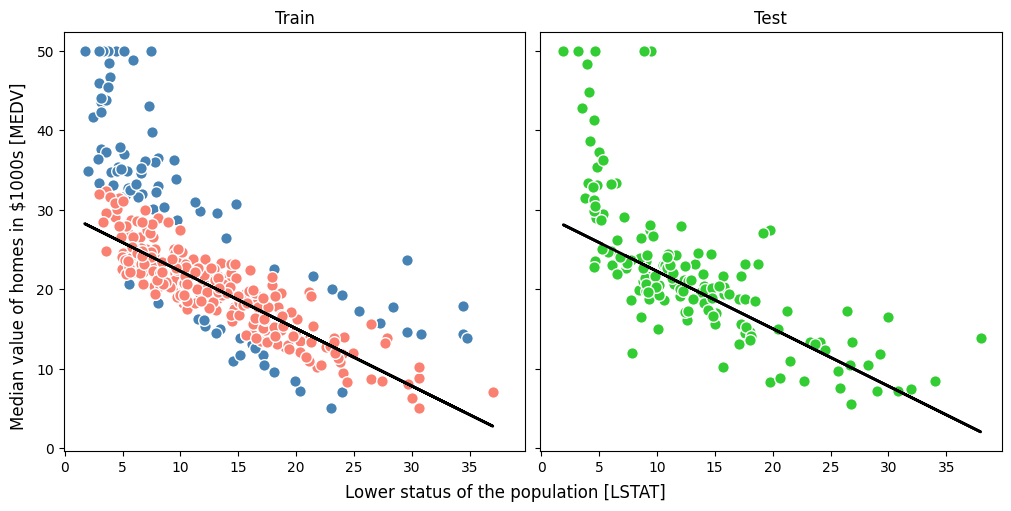

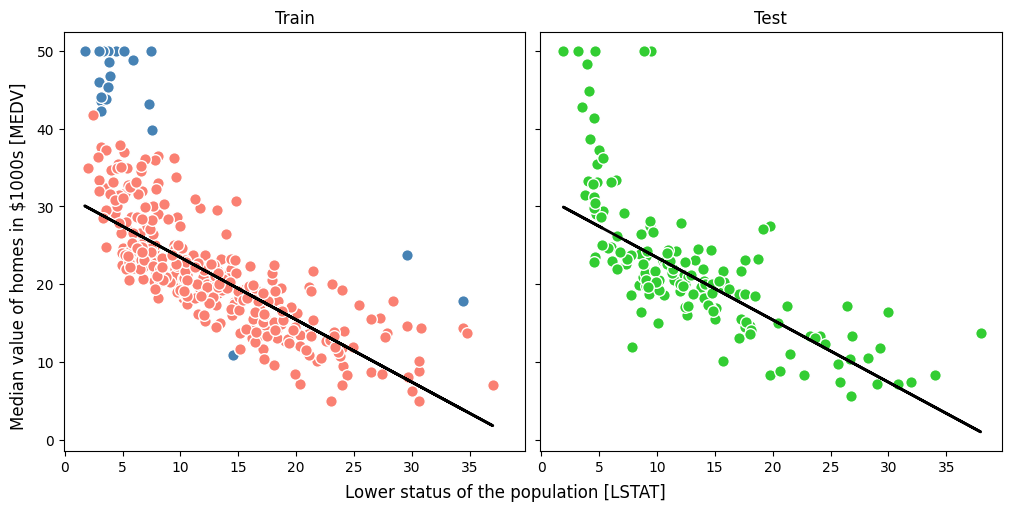

In [15]:
results = []

for name, values in paramSet.items():
    rc = RANSACRegressor(
        **values,
        estimator=LinearRegression(),
        max_trials=100,
        min_samples=50,
        loss="absolute_error",
        random_state=0,
    )

    # Fitting model
    rc.fit(X_train, y_train)
    y_train_pred = rc.predict(X_train)
    y_test_pred = rc.predict(X_test)

    store_results(
        results=results,
        model_name=f"RANSAC-{name}",
        model=rc.estimator_,  # Need to extract the model out from the wrapper.
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=values,
    )

    # Plotting regression
    fig, ax = plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

    # Plotting inliers and outliers
    inlier_mask = rc.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    ax[0].scatter(
        X_train[inlier_mask],
        y_train[inlier_mask],
        c="salmon",
        edgecolor="white",
        marker="o",
        label="Inliers",
        s=70,
    )

    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)